In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
# seaborn是python中的一个可视化库，是对matplotlib进行二次封装而成
import seaborn as sns

df=pandas.read_excel('data-14-01.xlsx')
print(df)

       CLLI_OID       CL_NO  LINE_NO INCUR_DATE_FROM INCUR_DATE_TO BEN_HEAD  \
0       4452042  1404090122     99.1      2014-01-30    2014-01-30    S-GHF   
1       9211901  1403060586     58.0      2014-01-28    2014-01-28    S-YPF   
2       9211897  1403060586     57.0      2014-01-28    2014-01-28    S-GHF   
3       9211895  1403060586     56.0      2014-01-27    2014-01-27    S-YPF   
4      44122587  1506090532     56.0      2014-01-01    2014-01-01    S-YPF   
...         ...         ...      ...             ...           ...      ...   
41687  58165199  1601150066      1.0      2014-01-26    2014-01-26    S-GHF   
41688  58173526  1601190090      1.0      2014-01-28    2014-01-28   S-ZFYP   
41689  59304513  1602160065      1.0      2014-01-05    2014-01-05    S-CJF   
41690  20542423  1812040001      1.0      2014-01-15    2014-01-15   NS-YPF   
41691  86456481  2010100002      1.0      2014-01-01    2014-01-01    S-YPF   

      SCMA_OID_BEN_TYPE DIAG_CODE DIAG_DESC SCMA_OI

In [ ]:
plt.rcParams['font.sans-serif'] = ['Simhei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] =  False    #用来正常显示负号

import os
import time
pandas.set_option('display.max_columns', 999)    #设置数据展示的最大列数和最大行数
pandas.set_option('display.max_rows', 500)

In [66]:
df=pandas.read_excel('data-14-01_wcode.xlsx')

In [67]:
#根据CL_LINE_STATUS列创建FRAUD列
df.insert(df.shape[1],"FRAUD",0)

In [68]:
for i in range(df.shape[0]):
    if df.loc[i,"CL_LINE_STATUS"]=="AC":
        df.loc[i,"FRAUD"]=0
    else:
        df.loc[i,"FRAUD"]=1
        
    

In [69]:
df["FRAUD"].dtype

dtype('int64')

In [22]:
print(df.head().T)

                                                                            0  \
CLLI_OID                                                              4452042   
CL_NO                                                              1404090122   
LINE_NO                                                                  99.1   
INCUR_DATE_FROM                                           2014-01-30 00:00:00   
INCUR_DATE_TO                                             2014-01-30 00:00:00   
BEN_HEAD                                                                S-GHF   
SCMA_OID_BEN_TYPE                                             BENEFIT_TYPE_OP   
DIAG_CODE                                                             C22.900   
DIAG_DESC                                                               肝恶性肿瘤   
SCMA_OID_CL_LINE_STATUS                                     CL_LINE_STATUS_AC   
ORG_PRES_AMT                                                          RMB .64   
ORG_PRES_AMT_VALUE          

In [ ]:
# print every column with the first row
for col in df.columns:
    print(col, df[col][0])


    


CLLI_OID 4452042
CL_NO 1404090122
LINE_NO 99.1
INCUR_DATE_FROM 2014-01-30 00:00:00
INCUR_DATE_TO 2014-01-30 00:00:00
BEN_HEAD S-GHF
SCMA_OID_BEN_TYPE BENEFIT_TYPE_OP
DIAG_CODE C22.900
DIAG_DESC 肝恶性肿瘤
SCMA_OID_CL_LINE_STATUS CL_LINE_STATUS_AC
ORG_PRES_AMT RMB .64
ORG_PRES_AMT_VALUE 0.64
APP_AMT 0.32
BEN_SPEND 0.32
CODES R530, W220, W270
PROV_CODE 2729.0
PROV_NAME 东方肝胆外科医院
PAYEE_LAST_NAME nan
PAYEE_FIRST_NAME C
PAY_DATE 2014-06-10 00:00:00
PAY_AMT RMB .32
PAY_AMT_USD 0.32
CRT_USER ruanjie
CRT_DATE 2014-05-29 00:00:00
UPD_USER ruanjie
UPD_DATE 2014-06-09 00:00:00
RCV_DATE 2014-04-09 00:00:00
MBR_NO 6822900
MBR_FIRST_NAME C
MBR_LAST_NAME nan
SCMA_OID_PROD_TYPE PRODUCT_MD
SCMA_OID_CL_STATUS CL_STATUS_FC
STR_CRT_DATE 5292014
STR_UPD_DATE 6092014
BARCODE CBBAAAN531
PRI_CORR_BRKR_NAME BSI
POHO_NO 43000
SCMA_OID_CL_TYPE CL_TYPE_M
SCMA_OID_COUNTRY_TREATMENT COUNTRY_086
RJ_CODE_LIST CL_WARN_CODE_W220; CL_WARN_CODE_W270; CL_REJ_CODE_R530
RECHARGE_AMT 0.0
REJECTED_AMT -0.32
PAYMENT_STATUS nan
PAYME

In [20]:
## 遍历全部数据，查看是否有全部SCMA_OID_CL_LINE_STATUS包含CL_LINE_STATUS
for i in range(len(df)):
    ## 如果缺失
    if pandas.isna(df['SCMA_OID_CL_LINE_STATUS'][i]) or pandas.isna(df['CL_LINE_STATUS'][i]):
        print(i+"缺失")
        continue
    
    
    ## 如果SCMA_OID_CL_LINE_STATUS不包含CL_LINE_STATUS
    if df['SCMA_OID_CL_LINE_STATUS'][i][-2:] != df['CL_LINE_STATUS'][i]:
        print(df['SCMA_OID_CL_LINE_STATUS'][i], df['CL_LINE_STATUS'][i])
## 全部对应


    


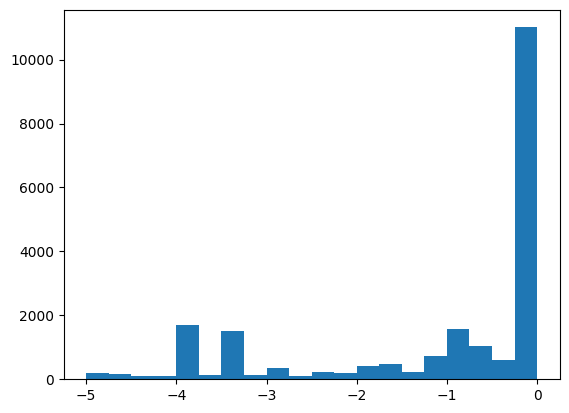

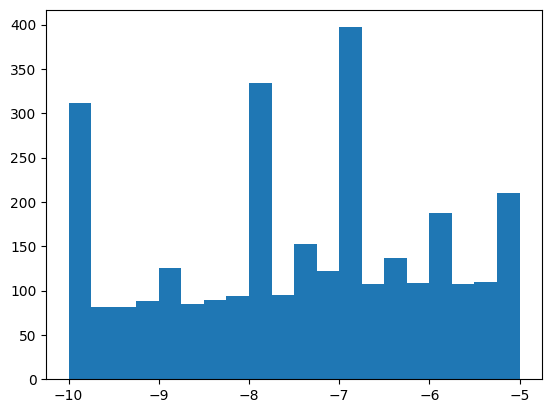

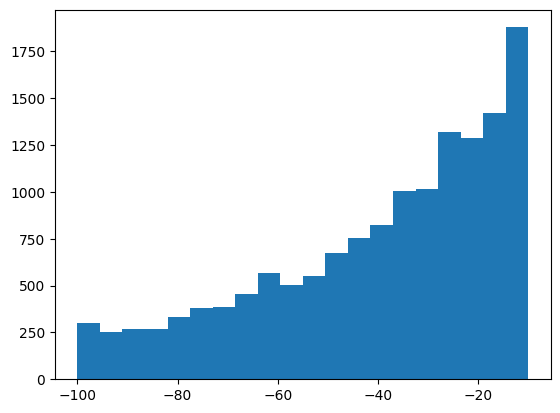

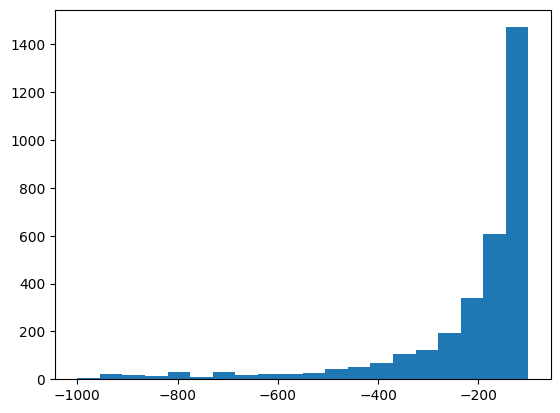

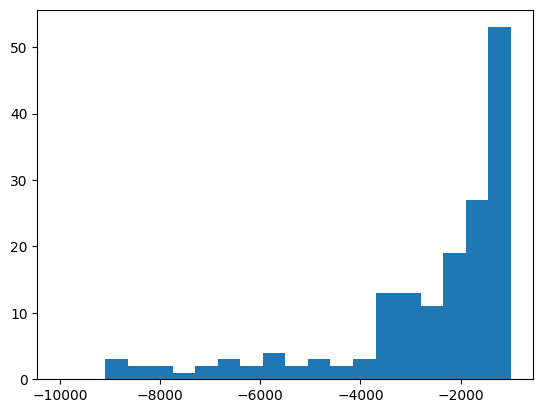

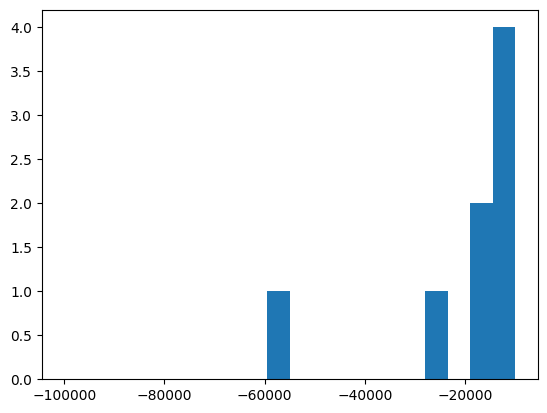

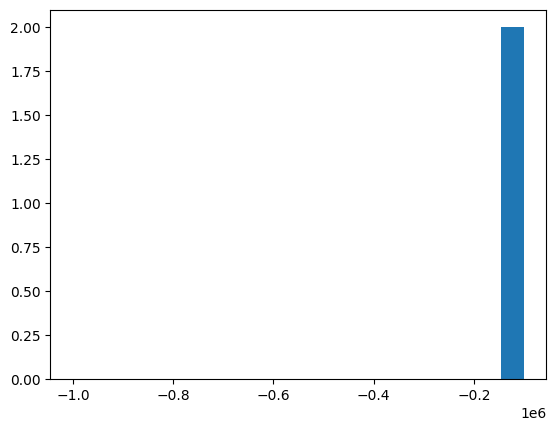

In [ ]:
## 查看REJECTED_AMT的分布
plt.hist(df['REJECTED_AMT'], bins=20,range=(-5,0))
plt.show()
plt.hist(df['REJECTED_AMT'], bins=20,range=(-10,-5))
plt.show()
plt.hist(df['REJECTED_AMT'], bins=20,range=(-100,-10))
plt.show()
plt.hist(df['REJECTED_AMT'], bins=20,range=(-1000,-100))
plt.show()
plt.hist(df['REJECTED_AMT'], bins=20,range=(-10000,-1000))
plt.show()
plt.hist(df['REJECTED_AMT'], bins=20,range=(-100000,-10000))
plt.show()
plt.hist(df['REJECTED_AMT'], bins=20,range=(-1000000,-100000))
plt.show()
## 极度右偏，取对数

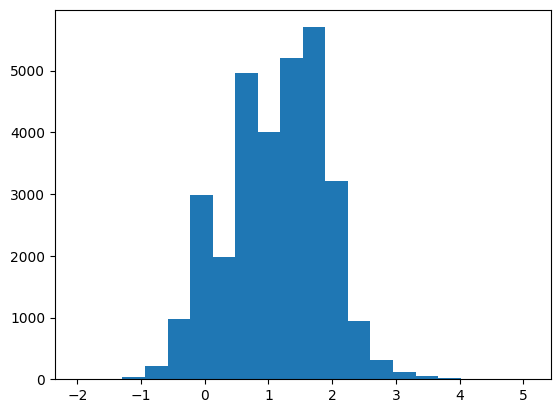

1.1135979800178288
0.7767022054628421


In [50]:
rejected_amt = df['REJECTED_AMT']
rejected_amt = np.array(rejected_amt)
## 去除nan
rejected_amt = rejected_amt[~np.isnan(rejected_amt)]
## 去掉0
rejected_amt = rejected_amt[rejected_amt != 0]
## log10
rejected_amt = np.log10(-rejected_amt)
## hist
plt.hist(rejected_amt, bins=20)
plt.show()
## 查看mean和std
print(np.mean(rejected_amt))
print(np.std(rejected_amt))

In [10]:
df_wcode=pandas.read_excel('警告代码.xlsx')


In [11]:
print(df_wcode)

        SYS_TYPE SYS_CODE                                          CODE_DESC
0   CL_WARN_CODE     W010                                                 追讨
1   CL_WARN_CODE     W020                                               超额索赔
2   CL_WARN_CODE     W030                                         所选房型高于保单规定
3   CL_WARN_CODE     W040                                     首次投保2年内发生的重大疾病
4   CL_WARN_CODE     W050                                               搁置付款
5   CL_WARN_CODE     W055                                            还未发缴费通知
6   CL_WARN_CODE     W056                                        保单还有尚未收回的款项
7   CL_WARN_CODE     W057                                        保单还有尚未收回的款项
8   CL_WARN_CODE     W060                                               补充产品
9   CL_WARN_CODE     W070                                      批准的理赔大于等于5000
10  CL_WARN_CODE     W080                                        当前的医疗计划不止一种
11  CL_WARN_CODE     W090                                           住院不足18小时

In [14]:
df_disease_code=pandas.read_excel('疾病代码.xlsx',header=None)

In [15]:
print(df_disease_code)

              0             1
0       A00.000       古典生物型霍乱
1       A00.100        埃尔托型霍乱
2       A00.900            霍乱
3       A01.000            伤寒
4      A01.001+         伤寒性肝炎
...         ...           ...
22859   Z99.201          血液透析
22860   Z99.200         依赖肾透析
22861   Z99.300         依赖轮椅者
22862   Z99.800  依赖特指可启动机器和装置
22863   Z99.900    依赖可启动机器和装置

[22864 rows x 2 columns]


In [72]:
df.isna().sum()
## 统计缺失值

CLLI_OID                          0
CL_NO                             0
LINE_NO                           0
INCUR_DATE_FROM                   0
INCUR_DATE_TO                     0
BEN_HEAD                          0
SCMA_OID_BEN_TYPE                 0
DIAG_CODE                         0
DIAG_DESC                         0
SCMA_OID_CL_LINE_STATUS           0
ORG_PRES_AMT                      0
ORG_PRES_AMT_VALUE                0
APP_AMT                         201
BEN_SPEND                       201
CODES                           264
PROV_CODE                        29
PROV_NAME                         8
PAYEE_LAST_NAME               38054
PAYEE_FIRST_NAME                 40
PAY_DATE                       3831
PAY_AMT                           0
PAY_AMT_USD                     201
CRT_USER                          0
CRT_DATE                          0
UPD_USER                          0
UPD_DATE                          0
RCV_DATE                          0
MBR_NO                      

### 1.1 查看字符型类别变量
- 查看数据类别分布情况，确认数据的可用性
- 对类别变量中存在的脏数据处理
- 筛选与建模无关的字段

In [15]:
# 查看类别变量的取值，即非数值型，这里是object

df.select_dtypes(include=['object']).columns.tolist()

['BEN_HEAD',
 'SCMA_OID_BEN_TYPE',
 'DIAG_CODE',
 'DIAG_DESC',
 'SCMA_OID_CL_LINE_STATUS',
 'ORG_PRES_AMT',
 'CODES',
 'PROV_NAME',
 'PAYEE_LAST_NAME',
 'PAYEE_FIRST_NAME',
 'PAY_AMT',
 'CRT_USER',
 'UPD_USER',
 'MBR_FIRST_NAME',
 'MBR_LAST_NAME',
 'SCMA_OID_PROD_TYPE',
 'SCMA_OID_CL_STATUS',
 'BARCODE',
 'PRI_CORR_BRKR_NAME',
 'SCMA_OID_CL_TYPE',
 'SCMA_OID_COUNTRY_TREATMENT',
 'RJ_CODE_LIST',
 'INVOICE_ID',
 'POCY_PLAN_DESC',
 'BEN_TYPE',
 'LINE_REMARK',
 'INVOICE_NO',
 'CL_LINE_STATUS',
 'ID_CARD_NO',
 'PLAN_REMARK',
 'PROV_LEVEL',
 'PROV_DEPT',
 'BOX_BARCODE',
 'WORKPLACE_NAME',
 'CL_PAY_ACCT_NAME',
 'BANK_NAME',
 'CL_PAY_ACCT_NO',
 'KIND_CODE',
 'POCY_REF_NO',
 'MBR_REF_NO',
 'CLSH_HOSP_CODE',
 'MBR_REF_NO_B',
 'CSR_REMARK',
 'MBR_TYPE',
 'MAN_REJ_CODE_DESC_1',
 'MAN_REJ_CODE_DESC_2',
 'MEMBER_EVENT',
 'INSUR_INVOICE_IND',
 'ORG_INSUR_INVOICE_IND',
 'BEN_HEAD_TYPE',
 'CL_CLAIM_FORMULA',
 'CL_LINE_FORMULA',
 'CL_INVOICE_FORMULA']

In [14]:
#出险开始日期
df['INCUR_DATE_FROM'].value_counts()

INCUR_DATE_FROM
2014-01-20    1972
2014-01-27    1964
2014-01-22    1821
2014-01-21    1759
2014-01-06    1737
2014-01-13    1736
2014-01-24    1723
2014-01-14    1693
2014-01-17    1658
2014-01-28    1646
2014-01-23    1611
2014-01-16    1601
2014-01-02    1595
2014-01-03    1576
2014-01-15    1539
2014-01-07    1539
2014-01-09    1504
2014-01-08    1503
2014-01-10    1468
2014-01-29    1182
2014-01-04    1097
2014-01-18    1089
2014-01-25    1063
2014-01-26    1055
2014-01-11    1005
2014-01-01     870
2014-01-12     662
2014-01-05     645
2014-01-19     623
2014-01-30     582
2014-01-31     174
Name: count, dtype: int64

In [ ]:
# 福利类型，value_counts，返回一个序列 Series,该序列包含每个值的数量
df['BEN_TYPE'].value_counts()

BEN_TYPE
OP        40319
MA          518
IP          490
YW-OP       156
MT          123
DT           54
IPCASB        8
VS            6
JW-OP         6
YW-IP         6
MDB           2
GG-IP         1
PA            1
MEMR          1
GG-OP         1
Name: count, dtype: int64

In [ ]:
#被保险人类型，spouse配偶，applicant申请人
df['MBR_TYPE'].value_counts()

MBR_TYPE
Applicant    40983
Child          660
Spouse          28
Parents         21
Name: count, dtype: int64

<Axes: xlabel='MBR_TYPE', ylabel='FRAUD'>

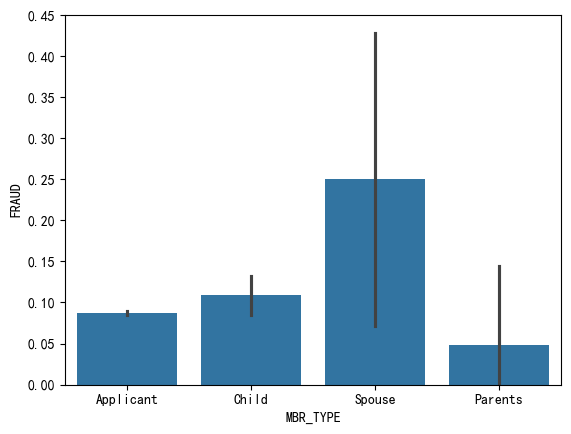

In [63]:
sns.barplot(x='MBR_TYPE',y='FRAUD', data=df)

In [64]:
df_MBR_TYPE = df.groupby('MBR_TYPE', as_index=False).agg({"FRAUD":['sum','mean','count']})
print(df_MBR_TYPE)

    MBR_TYPE FRAUD                 
               sum      mean  count
0  Applicant  3562  0.086914  40983
1      Child    72  0.109091    660
2    Parents     1  0.047619     21
3     Spouse     7  0.250000     28


In [ ]:
#福利项目
df['BEN_HEAD'].value_counts()

BEN_HEAD
S-YPF        11187
S-GHF         8651
F-YPF         4827
NF-YPF        3225
NS-YPF        3105
S-JCF         2950
F-JCF         1794
100PF-YPF     1517
S-ZLF          731
F-GHF          640
F-ZFYP         448
NS-ZFYP        247
ZYF            231
S-ZFYP         230
S-CJF          216
S-ZYF          177
MSD            174
100PF-JCF      150
MZY            148
F-ZLF          131
LAB            119
100PF          117
MT-YPF          99
MND             94
PS              34
ZY-CWF          32
JW-YPF          29
MZGKYC          23
ZY-ZFYP         22
OV              21
F-ZFJC          21
S-MZSS          19
NS-JCF          18
JW-GHF          18
RX              14
S-CLF           13
S-FMF           12
LC              11
F-ZYF           10
MT-ZLF           9
YJ-YPF           9
NS-ZLF           8
CASB             8
BTAT             8
EXLS             6
JZS-YPF          5
LAMB             5
MT-JCF           4
EXC              4
YJ-JCF           4
MF               4
ACUP             4
WSS

In [9]:
df['PROV_LEVEL'].value_counts()

PROV_LEVEL
三级     21556
二级     10345
未评级     6772
一级      2769
医保       153
非医保       39
未知        13
卫生所       10
特需         6
Name: count, dtype: int64

In [13]:
#被保险人备注
df['MEMBER_EVENT'].value_counts()

MEMBER_EVENT
N    41658
Y       34
Name: count, dtype: int64

In [11]:
df['INSUR_INVOICE_IND'].value_counts()

INSUR_INVOICE_IND
N    41691
H        1
Name: count, dtype: int64

In [ ]:
df['DIAG_CODE'].value_counts()


DIAG_CODE
J06.900     8227
I10.x00I    2082
R50.900     1441
R05.x00     1382
E14.900      933
            ... 
D06.000        1
S93.200        1
L03.000        1
G45.000        1
K07.302        1
Name: count, Length: 1160, dtype: int64

In [60]:
# 和欺诈相关的疾病编码的名称总数
print("和欺诈相关的疾病编码的名称总数为：",len(df['DIAG_CODE'][df['FRAUD'] == 1].value_counts()))
# 和欺诈无关的疾病编码的名称总数
print("和欺诈无关的疾病编码的名称总数为：",len(df['DIAG_CODE'][df['FRAUD'] == 0].value_counts()))

#疾病编码的总数目
print("疾病编码的总数目",len(df['DIAG_CODE'].value_counts()))

和欺诈相关的疾病编码的名称总数为： 439
和欺诈无关的疾病编码的名称总数为： 1077
疾病编码的总数目 1160


In [ ]:
df['PROV_NAME'].value_counts()

PROV_NAME
广州市达康经济发展有限公司卫生所        5627
上海市第六人民医院               1047
广州第一人民医院南沙区中心医院广丰门诊部     938
复旦大学附属华山医院               903
广州市南沙中心医院                902
                        ... 
湖北省妇幼保健院（湖北省妇女儿童医院）        1
济南市长清区人民医院                 1
东风总医院红卫门诊                  1
广州军区联勤部门诊部                 1
临安市妇幼保健院                   1
Name: count, Length: 1122, dtype: int64

In [80]:
# Create a dictionary of Chinese provinces, autonomous regions, and directly-administered municipalities
provinces = {
    '北京': '北京市', '天津': '天津市', '上海': '上海市', '重庆': '重庆市',
    '河北': '河北省', '山西': '山西省', '辽宁': '辽宁省', '吉林': '吉林省', 
    '黑龙江': '黑龙江省', '江苏': '江苏省', '浙江': '浙江省', '安徽': '安徽省',
    '福建': '福建省', '江西': '江西省', '山东': '山东省', '河南': '河南省', 
    '湖北': '湖北省', '湖南': '湖南省', '广东': '广东省', '海南': '海南省', 
    '四川': '四川省', '贵州': '贵州省', '云南': '云南省', '陕西': '陕西省', 
    '甘肃': '甘肃省', '青海': '青海省', '台湾': '台湾省',
    '内蒙古': '内蒙古自治区', '广西': '广西壮族自治区', '西藏': '西藏自治区', 
    '宁夏': '宁夏回族自治区', '新疆': '新疆维吾尔自治区',
    '香港': '香港特别行政区', '澳门': '澳门特别行政区'
}

# Add cities as keys that map to their provinces
cities_to_provinces = {
    '广州': '广东省', '深圳': '广东省', '珠海': '广东省', '汕头': '广东省', '佛山': '广东省',
    '杭州': '浙江省', '宁波': '浙江省', '温州': '浙江省', '绍兴': '浙江省', '湖州': '浙江省',
    '南京': '江苏省', '无锡': '江苏省', '徐州': '江苏省', '常州': '江苏省', '苏州': '江苏省',
    '成都': '四川省', '自贡': '四川省', '攀枝花': '四川省', '泸州': '四川省', '德阳': '四川省',
    '临安': '浙江省',  # 临安市现属于杭州市
    '长宁': '上海市'   # 长宁区属于上海市
}

# Function to map provider names to provinces
def map_to_province(provider_name):
    if pandas.isna(provider_name):
        return "未知省份"
    
    # Check for province names
    for prefix, province in provinces.items():
        if provider_name.startswith(prefix):
            return province
    
    # Check for city names
    for city, province in cities_to_provinces.items():
        if provider_name.startswith(city):
            return province
    
    return "未知省份"

# Create a new column for province
df['PROVINCE'] = df['PROV_NAME'].apply(map_to_province)

# Count the number of entries for each province
province_counts = df['PROVINCE'].value_counts()
print(province_counts)

# Count fraud cases by province
fraud_by_province = df.groupby('PROVINCE')['FRAUD'].sum().sort_values(ascending=False)
print("\nFraud cases by province:")
print(fraud_by_province)

PROVINCE
广东省        14514
上海市        13574
未知省份       11865
北京市          626
天津市          473
江苏省          173
浙江省          160
湖南省          130
重庆市           36
湖北省           22
香港特别行政区       18
贵州省           16
云南省           13
山东省           13
内蒙古自治区        12
安徽省            7
海南省            6
四川省            6
黑龙江省           6
广西壮族自治区        4
福建省            4
吉林省            4
江西省            4
河南省            2
河北省            2
辽宁省            1
山西省            1
Name: count, dtype: int64

Fraud cases by province:
PROVINCE
未知省份       1376
上海市        1250
广东省         655
北京市         175
天津市          59
湖南省          41
江苏省          32
重庆市          17
浙江省          12
山东省           5
福建省           4
香港特别行政区       4
云南省           3
四川省           2
河北省           2
湖北省           2
吉林省           1
河南省           1
内蒙古自治区        1
辽宁省           0
贵州省           0
安徽省           0
海南省           0
江西省           0
广西壮族自治区       0
山西省           0
黑龙江省          0
Name: FRAUD, dtype: int64


### 1.2 查看整型int64变量
- 需要后续对变量COPAY_PCT（自负比例）和CWF_AMT_DAY（福利项目的日限额）进行字符编码处理。
- 并确认出和建模无关的需要删除的列：MBR_NO，INCUR_DATE_FROM_YEAR，INCUR_DATE_TO_YEAR

In [29]:
df.select_dtypes(include=['int64']).columns.tolist()

['CLLI_OID',
 'CL_NO',
 'MBR_NO',
 'STR_CRT_DATE',
 'STR_UPD_DATE',
 'POHO_NO',
 'POPL_OID',
 'CL_LINE_NO',
 'COPAY_PCT',
 'CWF_AMT_DAY',
 'PLAN_OID',
 'POCY_NO',
 'NO_OF_YR',
 'INVOICE_CNT',
 'POLICY_CNT']

In [ ]:
df['KIND_CODE'].value_counts()

KIND_CODE
7100014    12970
员工          9813
退休          7936
7100013     4119
退休大病         911
大病           421
高管           280
7102001      243
6100016      148
子女           126
配偶            51
7101001       31
家属            24
7100012        6
配偶生育           1
Name: count, dtype: int64

In [33]:
import seaborn as sns   #绘图库

In [30]:
# COPAY_PCT 自负比例%
df["COPAY_PCT"].value_counts().sort_index()  #根据index的值进行排序
#df["COPAY_PCT"].value_counts()

COPAY_PCT
20         3
30         8
50     18892
55       192
60      3361
65        35
70      2033
72       119
75       370
80      1639
85      1069
90      3942
95       165
100     9864
Name: count, dtype: int64

<Axes: xlabel='COPAY_PCT', ylabel='FRAUD'>

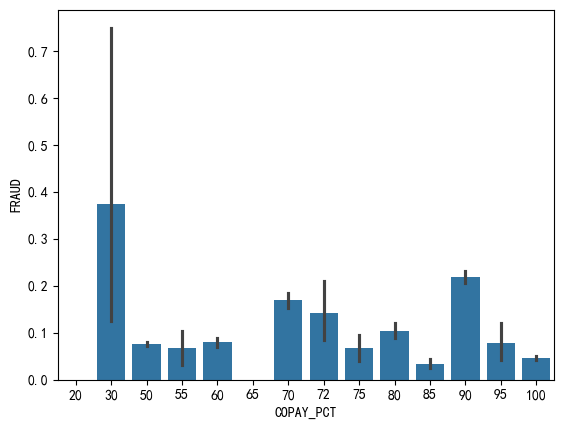

In [61]:
sns.barplot(x='COPAY_PCT',y='FRAUD', data=df)

In [65]:
#CWF_AMT_DAY 福利项目的日限额
df["CWF_AMT_DAY"].value_counts().sort_index()
#数据为数值型离散变量，需要后续做编码处理

CWF_AMT_DAY
0      24465
25      2414
30      1278
40         8
50      4113
80      2316
100     4487
120     2274
150      219
200       89
300       29
Name: count, dtype: int64

<Axes: >

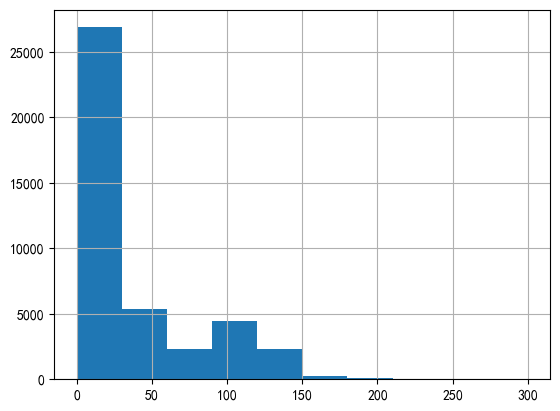

In [31]:
#从数据的分布可以看出"福利项目日限额"字段虽然是数值型变量，但是取值离散化，可以当成分类变量处理
df['CWF_AMT_DAY'].hist()

In [76]:
df["INVOICE_CNT"].value_counts().sort_index()

INVOICE_CNT
1      8072
2      4611
3      3226
4      4028
5      2922
6      3233
7      1818
8      1958
9      1313
10     1328
11     1135
12      971
13      735
14      678
15      443
16      507
17      437
18      494
19      311
20      300
21      341
22      228
23      187
24      228
25      109
26       96
27      160
28      154
29       73
30       74
31      134
32      150
33       69
34      118
35       51
36       76
37       90
38       57
39       41
40       36
41       28
42       42
43      127
44       38
45       34
46       22
47        8
48       21
50       57
51       14
53       14
54       31
55       16
56       28
57        4
58       58
60       59
61        9
62        4
64        8
66        1
78       14
97       20
99       17
101      18
122       8
Name: count, dtype: int64

<Axes: xlabel='INVOICE_CNT', ylabel='FRAUD'>

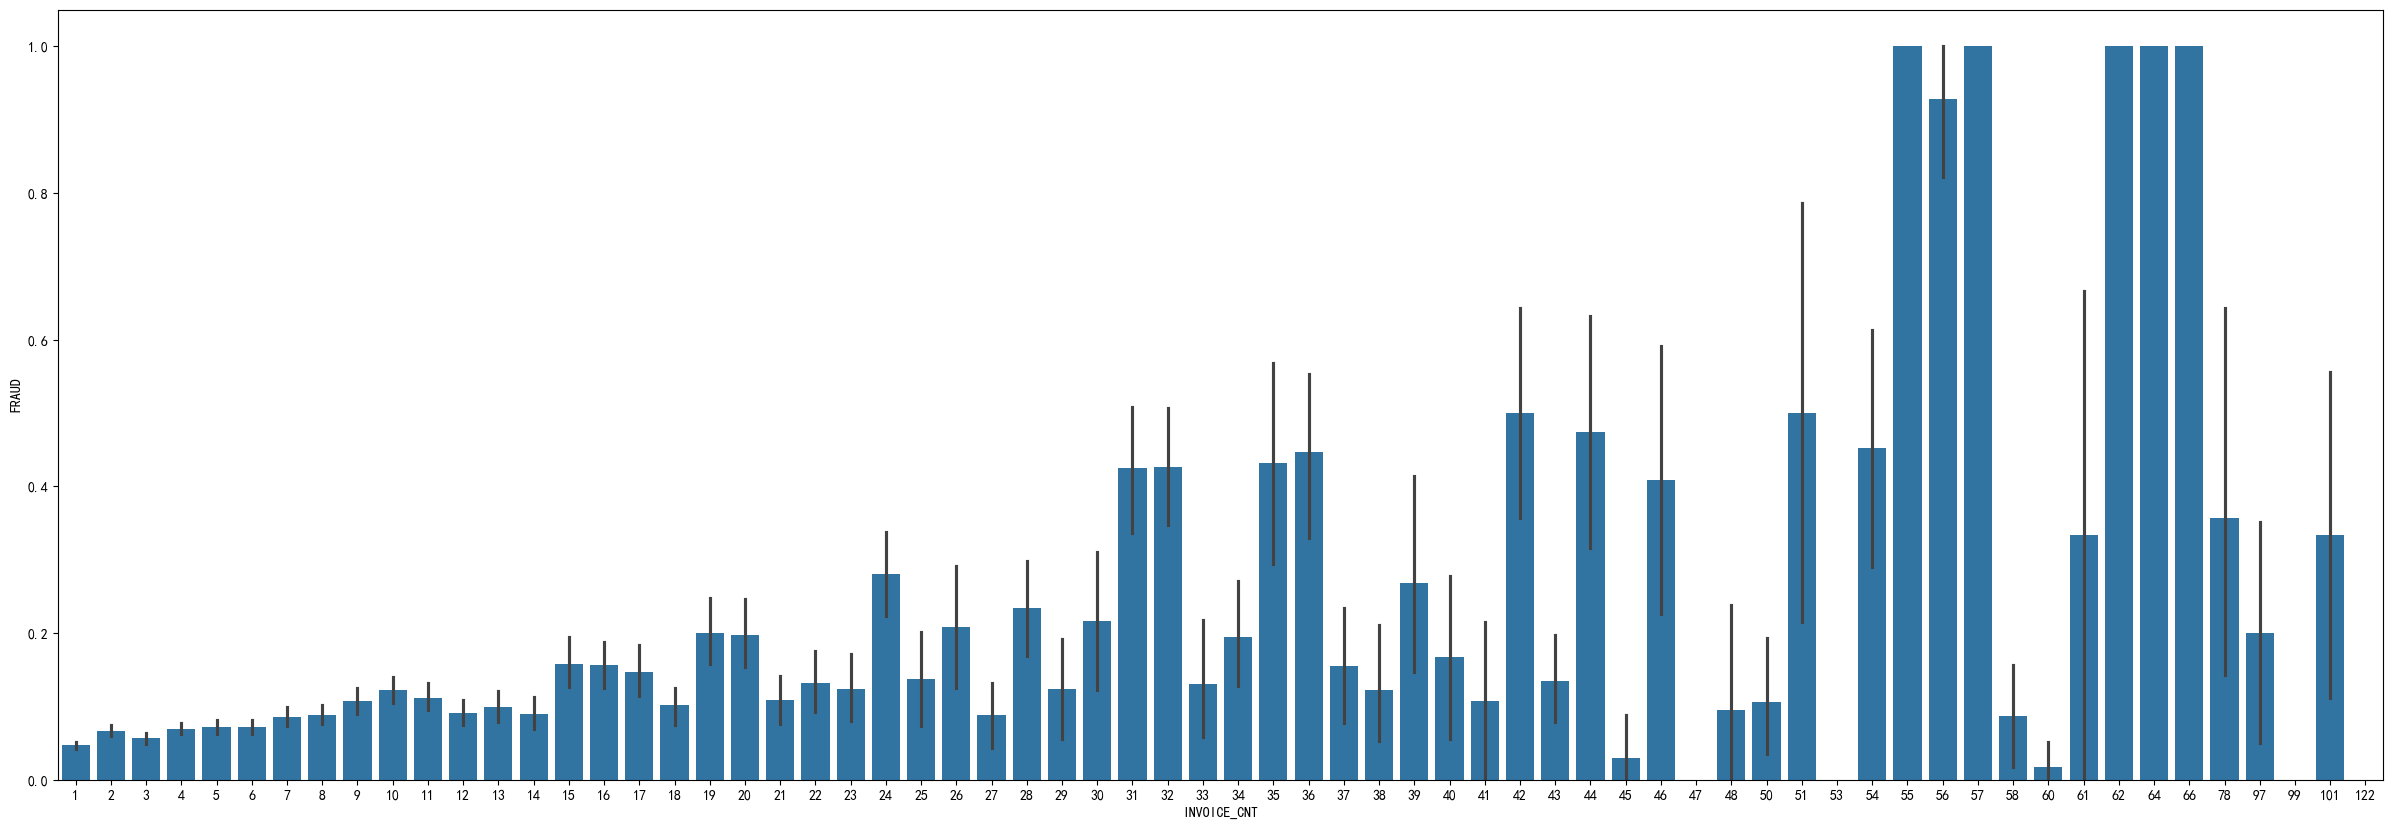

In [75]:
f,ax = plt.subplots(figsize=(30,10))
sns.barplot(x='INVOICE_CNT',y='FRAUD', data=df)

In [77]:
df["POLICY_CNT"].value_counts().sort_index()

POLICY_CNT
1    41419
2      273
Name: count, dtype: int64

<Axes: xlabel='POLICY_CNT', ylabel='FRAUD'>

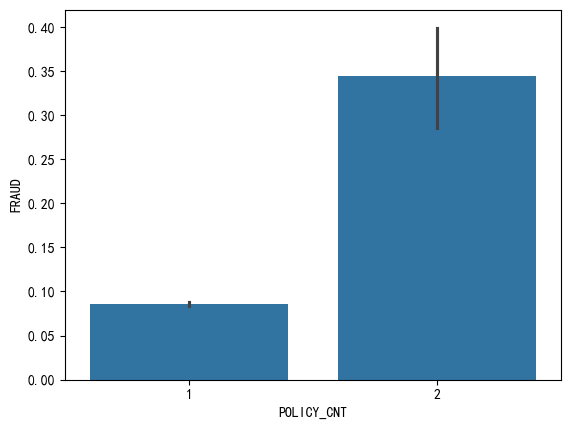

In [78]:
sns.barplot(x='POLICY_CNT',y='FRAUD', data=df)

## 2. 数据探索性分析与可视化

- 查看数据关联关系的关系图

- 用violin图探索FRAUD和某些变量（连续变量例如金额与欺诈的关系catplo，分类变量例如区域/性别和欺诈barplot）之间的关系

 **2.1 查看数据关联关系的关系图**

In [51]:
df['FRAUD'] = df['FRAUD'].astype('int')

<Axes: >

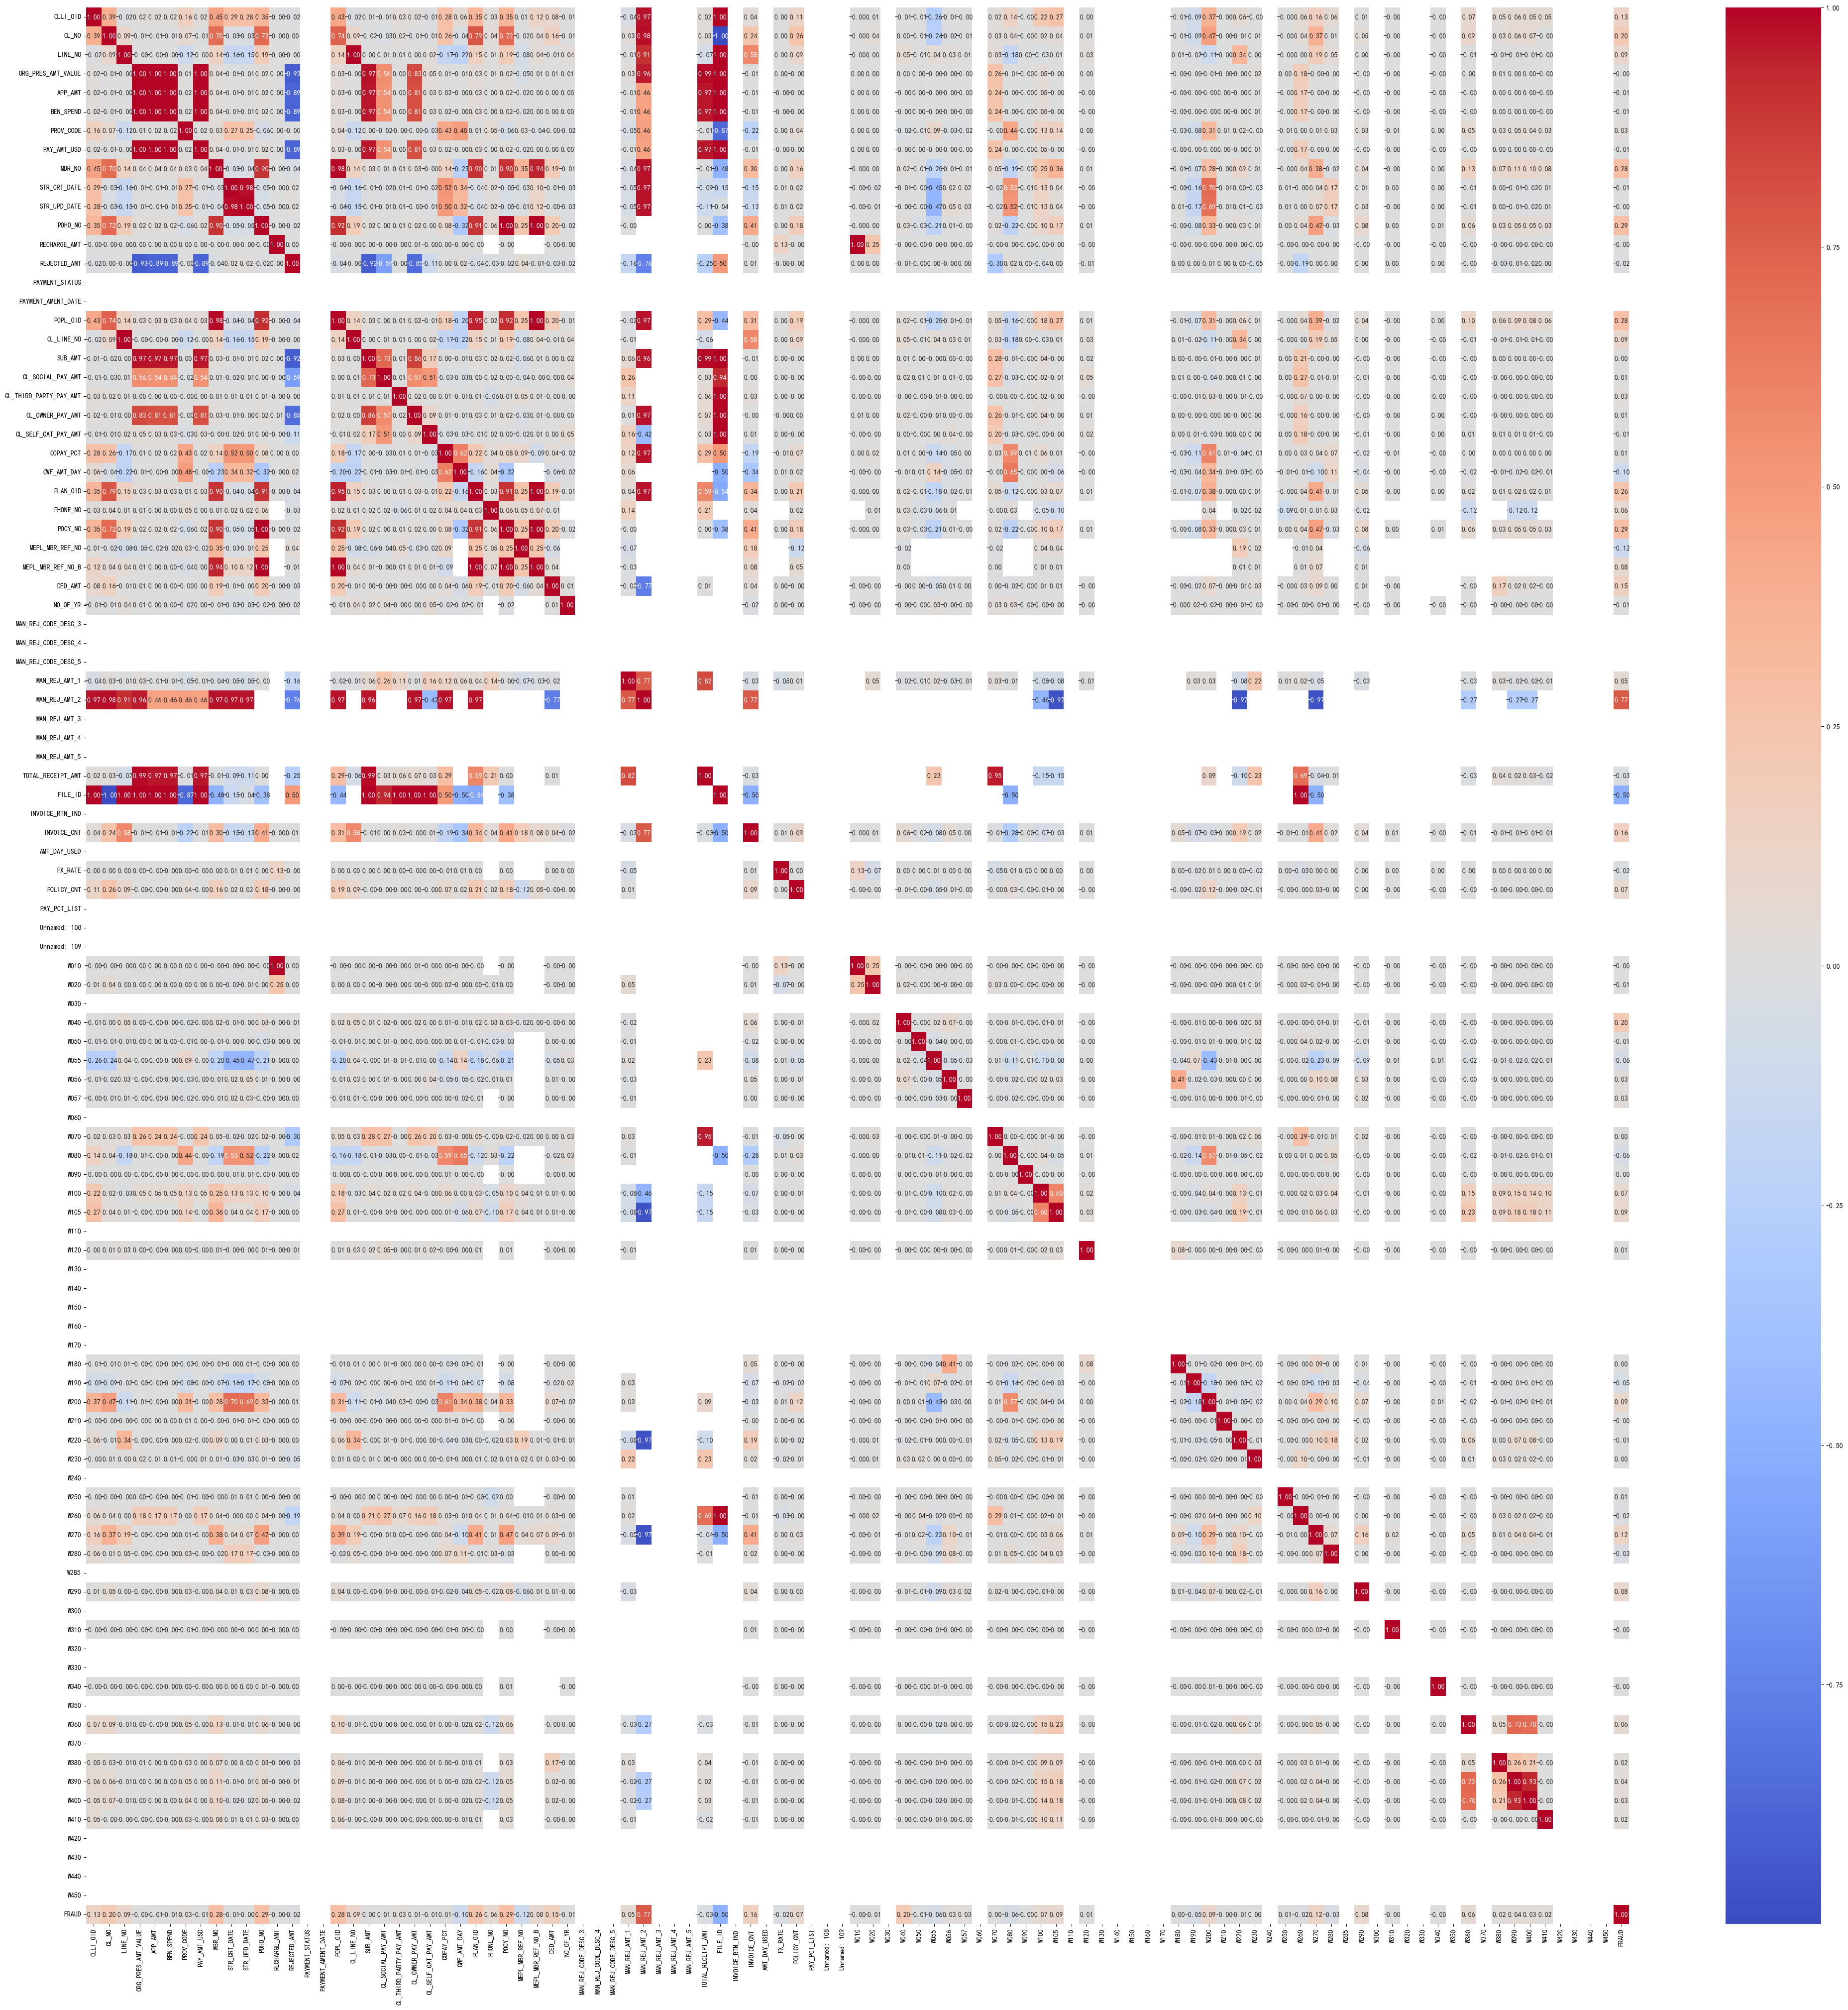

In [ ]:



numeric_columns = df
#corr 相关系数函数，[-1,1]，-1反相关，+1正相关
corrmat = numeric_columns.corr()
#print(corrmat)
f,ax = plt.subplots(figsize=(50,50))
sns.heatmap(corrmat, cmap='coolwarm', annot=True, fmt='.2f')